In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kendalltau as kt
from sklearn.linear_model import LinearRegression
%matplotlib inline
%config IPCompleter.greedy=True

In [135]:
data = pd.read_csv("data.csv", header=0)

cscore = data['cscore'].values

mask = cscore > 0

names = data['PDBID'].values[mask]

tio2x5 = data['rcsb_TiO2_Anatase_5'].values[mask]
tio2y5 = data['itasser_TiO2_Anatase_5'].values[mask]

tio2x50 = data['rcsb_TiO2_Anatase_50'].values[mask]
tio2y50 = data['itasser_TiO2_Anatase_50'].values[mask]

tio2x100 = data['rcsb_TiO2_Anatase_100'].values[mask]
tio2y100 = data['itasser_TiO2_Anatase_100'].values[mask]

tio2x200 = data['rcsb_TiO2_Anatase_200'].values[mask]
tio2y200 = data['itasser_TiO2_Anatase_200'].values[mask]

goldx5 = data['rcsb_Au_5'].values[mask]
goldy5 = data['itasser_Au_5'].values[mask]

goldx50 = data['rcsb_Au_50'].values[mask]
goldy50 = data['itasser_Au_50'].values[mask]

goldx100 = data['rcsb_Au_100'].values[mask]
goldy100 = data['itasser_Au_100'].values[mask]

goldx200 = data['rcsb_Au_200'].values[mask]
goldy200 = data['itasser_Au_200'].values[mask]

sio2x5 = data['rcsb_SiO2_Quartz_5'].values[mask]
sio2y5 = data['itasser_SiO2_Quartz_5'].values[mask]

sio2x50 = data['rcsb_SiO2_Quartz_50'].values[mask]
sio2y50 = data['itasser_SiO2_Quartz_50'].values[mask]

sio2x100 = data['rcsb_SiO2_Quartz_100'].values[mask]
sio2y100 = data['itasser_SiO2_Quartz_100'].values[mask]

sio2x200 = data['rcsb_SiO2_Quartz_200'].values[mask]
sio2y200 = data['itasser_SiO2_Quartz_200'].values[mask]

cdsex5 = data['rcsb_CdSe_5'].values[mask]
cdsey5 = data['itasser_CdSe_5'].values[mask]

cdsex50 = data['rcsb_CdSe_50'].values[mask]
cdsey50 = data['itasser_CdSe_50'].values[mask]

cdsex100 = data['rcsb_CdSe_100'].values[mask]
cdsey100 = data['itasser_CdSe_100'].values[mask]

cdsex200 = data['rcsb_CdSe_200'].values[mask]
cdsey200 = data['itasser_CdSe_200'].values[mask]

print(len(sio2x100))

93


In [136]:
color = []
r = 0
g = 0
b = 0
offset = 1234567
for i in range(len(goldx50)):
    r = r + offset
    g = g + int(r / 255)
    b = b + int(g / 255)
    color.append([(r % 255) / 255, (g % 255) / 255, (b % 222) / 255])
color = np.asarray(color)

In [137]:
tio2x = np.concatenate((tio2x5, tio2x50, tio2x100, tio2x100))
tio2y = np.concatenate((tio2y5, tio2y50, tio2y100, tio2y200))

goldx = np.concatenate((goldx5, goldx50, goldx100, goldx200))
goldy = np.concatenate((goldy5, goldy50, goldy100, goldy200))

sio2x = np.concatenate((sio2x5, sio2x50, sio2x100, sio2x200))
sio2y = np.concatenate((sio2y5, sio2y50, sio2y100, sio2y200))

cdsex = np.concatenate((cdsex5, cdsex50, cdsex100, cdsey200))
cdsey = np.concatenate((cdsey5, cdsey50, cdsey100, cdsey200))

<h1>Generate Plot</h1>

Text(-0.02, 0.5, 'Computational [k$_B$T]')

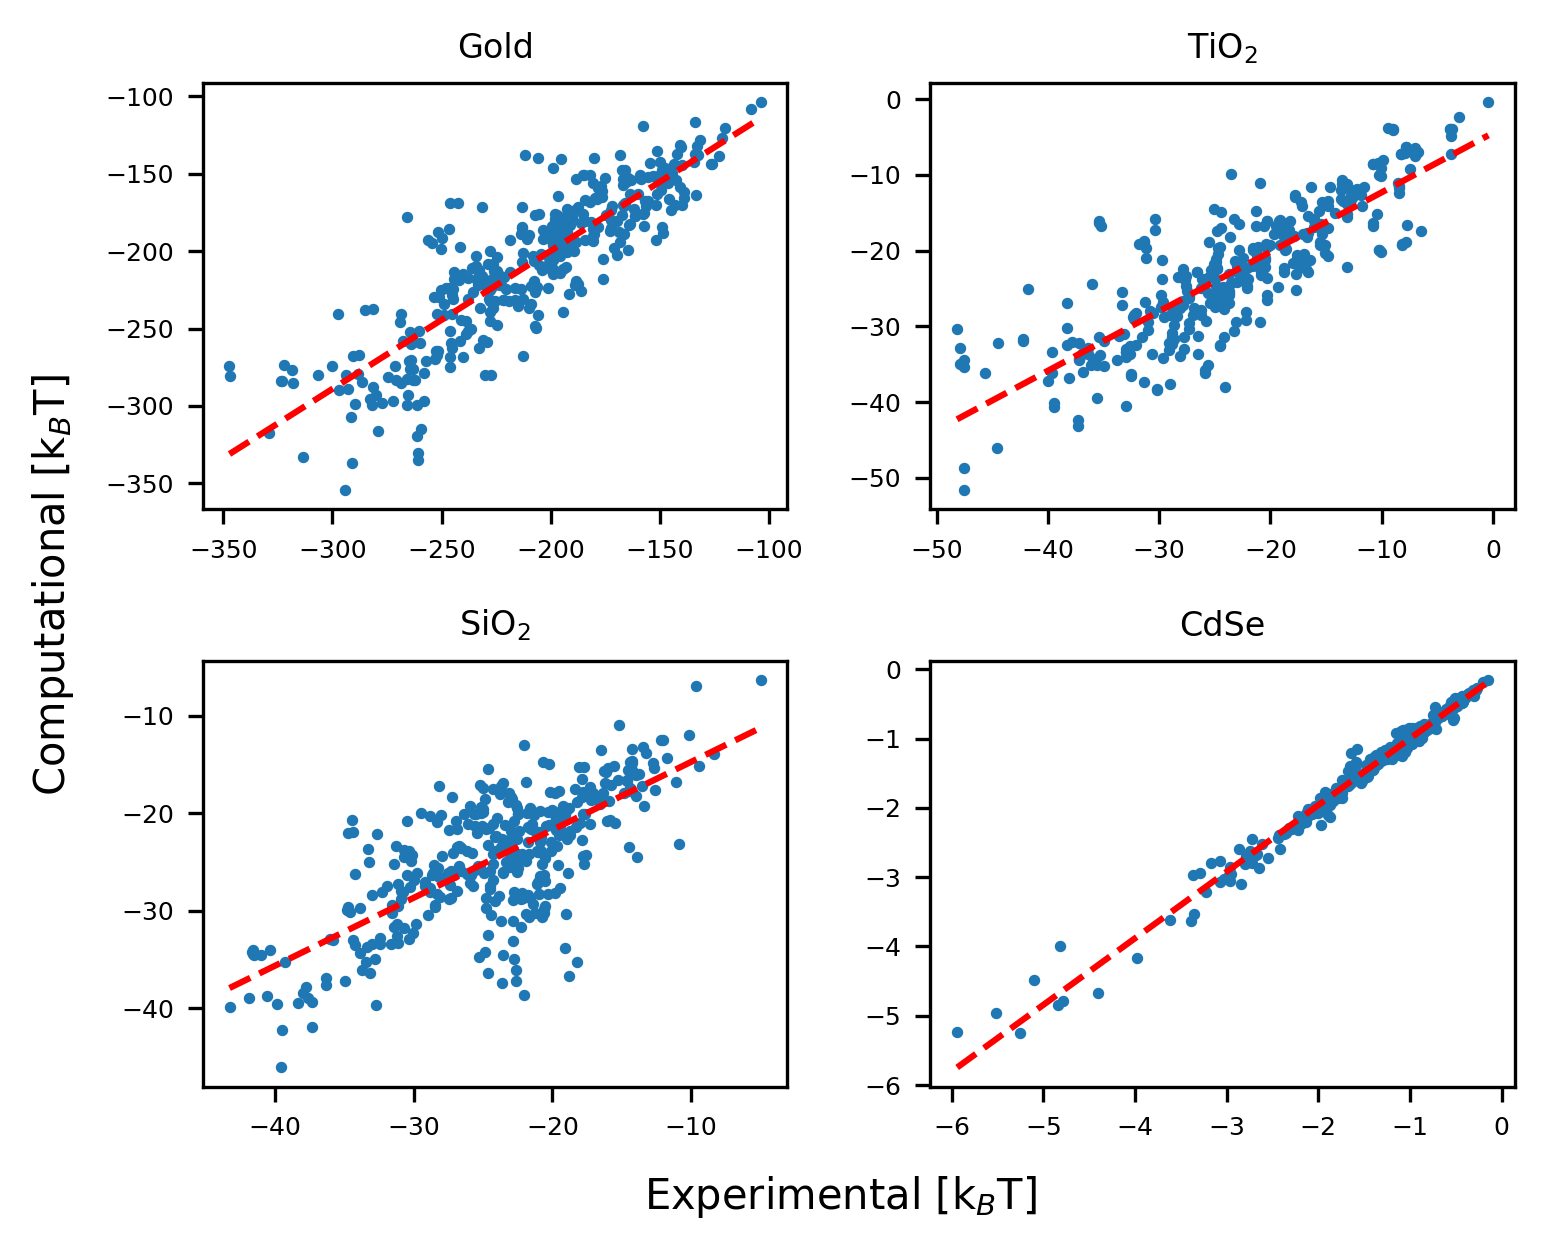

In [138]:
def scatter_plot(X, Y, title, row, col, fit_intercept = True):
    axes[row][col].scatter(X, Y, s = pointSize)
    axes[row][col].set_title(title, fontsize = titleSize)
    linear = LinearRegression(fit_intercept = fit_intercept)
    linear.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    trendx = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
    trendy = linear.predict(trendx)
    axes[row][col].plot(trendx, trendy, 'r--')
    axes[row][col].tick_params(labelsize = tickSize)
    

pointSize = 3
titleSize  = 8
tickSize  = 6
labelSize = 10

fig, axes = plt.subplots(2, 2, figsize=(5, 4), dpi = 300, tight_layout = True)

scatter_plot(goldx, goldy, "Gold", 0, 0)
scatter_plot(tio2x, tio2y, "TiO$_2$", 0, 1)
scatter_plot(sio2x, sio2y, "SiO$_2$", 1, 0)
scatter_plot(cdsex, cdsey, "CdSe", 1, 1)

fig.text(0.52, -0.02, r"Experimental [k$_B$T]", ha='center', fontsize = labelSize)
fig.text(-0.02, 0.5, r"Computational [k$_B$T]", va='center', rotation='vertical', fontsize = label_size)

<h1>Statistics</h1>

In [139]:
from sklearn.model_selection import train_test_split

def CalculateR2(Ye, Yp):
    #SS_res = np.sum(np.power(Ye - Yp, 2.0))
    #SS_tot = np.sum(np.power(Ye - np.mean(Ye), 2.0))
    #return 1.0 - SS_res / SS_tot
    
    n = len(Ye)
    r = (n * np.sum(Ye * Yp) - np.sum(Ye) * np.sum(Yp)) / np.sqrt((n * np.sum(Ye * Ye) - np.sum(Ye)**2.0) * (n * np.sum(Yp * Yp) - np.sum(Yp)**2.0))
    return r * r
    

def R2_Leave_One_Out(X1, Y1):
    size = X1.shape[0]
    prediction = np.zeros((size))
    for index in range(size):
        mask = np.zeros((size), dtype = bool)
        mask[index] = True;
        linear = LinearRegression()
        linear.fit(X1[~mask].reshape(-1, 1), Y1[~mask].reshape(-1, 1))
        prediction[index] = linear.predict(X1[mask][0].reshape(-1, 1))
    return CalculateR2(Y1, prediction)


def R2_Leave_Many_Out(X2, Y2, test_size = 0.25):
    y2          = np.array(())
    prediction = np.array(())
    for i in range(4):
        X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = test_size)
        linear = LinearRegression()
        linear.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
        y2 = np.append(y2, Y_test)
        prediction = np.append(prediction, linear.predict(X_test.reshape(-1, 1)))        
    return CalculateR2(y2, prediction)


def R2_Y_Randomize(X3, Y3):
    Y4 = np.copy(Y3)
    np.random.shuffle(Y4)
    return CalculateR2(X3, Y4)


def getR2Row(x, y, label):
    r2 = CalculateR2(x, y)
    r2_loo = R2_Leave_One_Out(x, y)
    r2_lmo = R2_Leave_Many_Out(x, y)
    r2_y_rand = R2_Y_Randomize(x, y)
    print(f"{label} & {r2:.2} & {r2_loo:.2} & {r2_lmo:.2} & {r2_y_rand:.2} \\\\")

In [140]:
#getR2Row(goldx5, goldy5, "Gold")
#getR2Row(tio2x5, tio2y5, "TiO2")
#getR2Row(sio2x5, sio2y5, "SiO2")
#getR2Row(cdsex5, cdsey5, "CdSe")

#getR2Row(goldx50, goldy50, "Gold")
#getR2Row(tio2x50, tio2y50, "TiO2")
#getR2Row(sio2x50, sio2y50, "SiO2")
#getR2Row(cdsex50, cdsey50, "CdSe")

getR2Row(goldx, goldy, "Gold")
getR2Row(tio2x, tio2y, "TiO2")
getR2Row(sio2x, sio2y, "SiO2")
getR2Row(cdsex, cdsey, "CdSe")



Gold & 0.74 & 0.74 & 0.73 & 0.0001 \\
TiO2 & 0.71 & 0.71 & 0.7 & 0.00036 \\
SiO2 & 0.52 & 0.52 & 0.52 & 0.023 \\
CdSe & 0.98 & 0.98 & 0.98 & 0.0017 \\


In [141]:
def reorder(names, values):
    return pd.DataFrame(zip(names, values), columns = ['Names', 'Values']).sort_values(by = "Values")['Names'].values

In [142]:
def kendallTauDist(dataSet1,dataSet2):
    '''Calculate the Kendall tau distance between two data sets calculated by performing a bubble-sort and counting the number of swaps. This returns the un-normalised value'''
    error = 0
    if len(dataSet1) != len(dataSet2):
        print("Input data sets are of different length ", len(dataSet1), " v ", len(dataSet2))
        error = 1
    if len(dataSet1) != len(  set(dataSet1) ):
        print("Data set 1 contains duplicated strings")
        error = 1
    if len(dataSet2) != len(  set(dataSet2) ):
        print("Data set 2 contains duplicated strings")
        error = 1
    xorSet = (set(dataSet1)^set(dataSet2)  )
    if len(xorSet ) >0:
        print("Data set 1 and 2 contain different entities: ",)
        print(xorSet)
        error = 1
    if error == 1:
        return - 1 #if an error has been found return -1 before doing anything slow
    dataDict1 = dict(zip (dataSet1, range(len(dataSet1))))
    dataSet2N = []
    for protein in dataSet2:
        dataSet2N.append(dataDict1[protein])
    numSwaps = 0
    for n in range(len(dataSet2N) ):
        for i in range(n+1,len(dataSet2N)):
            if dataSet2N[i] < dataSet2N[n]:
                dataSet2N[n],dataSet2N[i] = dataSet2N[i],dataSet2N[n]
                numSwaps +=1
    return numSwaps

def callktd(names, first, second):
    pdbRanking = reorder(names, first)
    itasserRanking = reorder(names, second)

    numProteins = len(pdbRanking)
    ktDist =  kendallTauDist(pdbRanking,itasserRanking)
    if ktDist!=-1:
        return 1 - 2*(ktDist *2.0/( numProteins*(numProteins-1.0)))

In [143]:
print(f"{callktd(names, goldx5, goldy5):0.2f} & {callktd(names, goldx50, goldy50):0.2f} & {callktd(names, goldx100, goldy100):0.2f} & {callktd(names, goldx200, goldy200):0.2f} \\\\")
print(f"{callktd(names, tio2x5, tio2y5):0.2f} & {callktd(names, tio2x50, tio2y50):0.2f} & {callktd(names, tio2x100, tio2y100):0.2f} & {callktd(names, tio2x200, tio2y200):0.2f} \\\\")
print(f"{callktd(names, sio2x5, sio2y5):0.2f} & {callktd(names, sio2x50, sio2y50):0.2f} & {callktd(names, sio2x100, sio2y100):0.2f} & {callktd(names, sio2x200, sio2y200):0.2f} \\\\")
print(f"{callktd(names, cdsex5, cdsey5):0.2f} & {callktd(names, cdsex50, cdsey50):0.2f} & {callktd(names, cdsex100, cdsey100):0.2f} & {callktd(names, cdsex200, cdsey200):0.2f} \\\\")

0.56 & 0.63 & 0.61 & 0.64 \\
0.68 & 0.65 & 0.66 & 0.66 \\
0.50 & 0.40 & 0.39 & 0.39 \\
0.88 & 0.88 & 0.88 & 0.88 \\


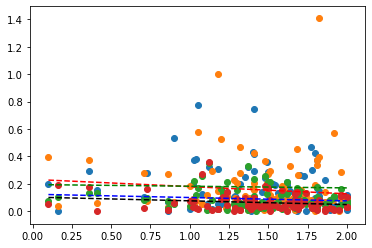

In [148]:
def trend_plot(X, A, B, c):
    Y = np.abs((A-B)/A)
    plt.scatter(X, Y)
    linear = LinearRegression(fit_intercept = True)
    linear.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    trendx = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
    trendy = linear.predict(trendx)
    plt.plot(trendx, trendy, f"{c}--")

    
trend_plot(cscore[mask], sio2x50, sio2y50, 'r')
trend_plot(cscore[mask], tio2x50, tio2y50, 'g')
trend_plot(cscore[mask], goldx50, goldy50, 'b')
trend_plot(cscore[mask], cdsex50, cdsey50, 'k')
